# Exploratory Data Analysis (EDA)
# Load dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('airbnbDataV3.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,listing_id,host_id,reviewer_id,host_name,Name,comments,sentimentVader,negVader,...,review_scores_value,date_reviewed,property_type,room_type,id,neighborhood,hostMentioned,adjectives_with_nouns,Tokens,Corpus_Length
0,0,0,12899,49682,69327,Ali And David,Rental unit in Portland,"Recommended! Very good value for a spacious, a...",0.9129,0.000,...,4.94,2010-01-24,Entire rental unit,Entire home/apt,24767,Concordia,1,"['good value', 'upper floor']","['Recommended', '!', 'Very', 'good', 'value', ...",16
1,1,1,12899,49682,72846,Ali And David,Rental unit in Portland,Our ten days visiting in Portland were enormou...,0.9081,0.000,...,4.94,2010-03-13,Entire rental unit,Entire home/apt,29230,Concordia,1,"['ten days', 'economical accomodations']","['Our', 'ten', 'day', 'visiting', 'Portland', ...",35
2,2,2,12899,49682,84196,Ali And David,Rental unit in Portland,We had a wonderful time staying in the area of...,0.9693,0.045,...,4.94,2010-03-16,Entire rental unit,Entire home/apt,29806,Concordia,1,"['wonderful time', 'great food', 'amazing home...","['We', 'wonderful', 'time', 'staying', 'area',...",45
3,3,3,12899,49682,89114,Ali And David,Rental unit in Portland,I stayed at Ali and David's place when I first...,0.7579,0.000,...,4.94,2010-03-31,Entire rental unit,Entire home/apt,32572,Concordia,1,[],"['I', 'stayed', 'Ali', 'David', ""'s"", 'place',...",32
4,4,4,12899,49682,100318,Ali And David,Rental unit in Portland,"Clean, comfortable, quiet rooms; easygoing gen...",0.9583,0.000,...,4.94,2010-04-02,Entire rental unit,Entire home/apt,32862,Concordia,0,"['quiet rooms', 'generous hosts', 'unlimited r...","['Clean', ',', 'comfortable', ',', 'quiet', 'r...",28


In [5]:
df.shape

(470365, 38)

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'listing_id', 'host_id', 'reviewer_id',
       'host_name', 'Name', 'comments', 'sentimentVader', 'negVader',
       'posVader', 'neutralVader', 'negRoberta', 'neutralRoberta',
       'posRoberta', 'host_rating', 'nouns', 'adjectives', 'number_of_reviews',
       'price', 'accommodates', 'Bedrooms', 'Bathrooms', 'Beds',
       'reviews_per_month', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'date_reviewed', 'property_type', 'room_type',
       'id', 'neighborhood', 'hostMentioned', 'adjectives_with_nouns',
       'Tokens', 'Corpus_Length'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0.1                     int64
Unnamed: 0                       int64
listing_id                       int64
host_id                          int64
reviewer_id                      int64
host_name                       object
Name                            object
comments                        object
sentimentVader                 float64
negVader                       float64
posVader                       float64
neutralVader                   float64
negRoberta                     float64
neutralRoberta                 float64
posRoberta                     float64
host_rating                    float64
nouns                           object
adjectives                      object
number_of_reviews                int64
price                          float64
accommodates                     int64
Bedrooms                       float64
Bathrooms                      float64
Beds                           float64
reviews_per_month              float64
review_scores_checkin    

In [8]:
print(df.describe())

        Unnamed: 0.1     Unnamed: 0    listing_id       host_id   reviewer_id  \
count  470365.000000  470365.000000  4.703650e+05  4.703650e+05  4.703650e+05   
mean   235182.000000  235182.000000  4.717933e+16  6.670466e+07  1.222491e+08   
std    135782.824021  135782.824021  1.798264e+17  9.627735e+07  1.288917e+08   
min         0.000000       0.000000  1.289900e+04  1.618000e+03  1.000000e+00   
25%    117591.000000  117591.000000  8.742729e+06  6.416589e+06  2.342441e+07   
50%    235182.000000  235182.000000  2.042500e+07  2.580699e+07  7.261117e+07   
75%    352773.000000  352773.000000  3.475194e+07  8.923916e+07  1.799950e+08   
max    470364.000000  470364.000000  1.043877e+18  5.475943e+08  5.510463e+08   

       sentimentVader       negVader       posVader   neutralVader  \
count   470365.000000  470365.000000  470365.000000  470365.000000   
mean         0.857410       0.010391       0.416213       0.573364   
std          0.196068       0.030538       0.150786       0.

# Missing Value

In [9]:
df.isna().sum()

Unnamed: 0.1                       0
Unnamed: 0                         0
listing_id                         0
host_id                            0
reviewer_id                        0
host_name                          0
Name                               0
comments                           0
sentimentVader                     0
negVader                           0
posVader                           0
neutralVader                       0
negRoberta                         0
neutralRoberta                     0
posRoberta                         0
host_rating                      551
nouns                              0
adjectives                         0
number_of_reviews                  0
price                          19155
accommodates                       0
Bedrooms                        4063
Bathrooms                        604
Beds                            2731
reviews_per_month                  0
review_scores_checkin              0
review_scores_communication        0
r

# Cleaning

In [10]:
df['host_rating'].fillna(df['host_rating'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].mean(), inplace=True)
df['Bathrooms'].fillna(df['Bathrooms'].mean(), inplace=True)
df['Beds'].fillna(df['Beds'].mean(), inplace=True)

In [11]:
df.isna().sum()

Unnamed: 0.1                   0
Unnamed: 0                     0
listing_id                     0
host_id                        0
reviewer_id                    0
host_name                      0
Name                           0
comments                       0
sentimentVader                 0
negVader                       0
posVader                       0
neutralVader                   0
negRoberta                     0
neutralRoberta                 0
posRoberta                     0
host_rating                    0
nouns                          0
adjectives                     0
number_of_reviews              0
price                          0
accommodates                   0
Bedrooms                       0
Bathrooms                      0
Beds                           0
reviews_per_month              0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
date_reviewed                  0
property_t

In [12]:
features = ['price', 'accommodates', 'Bedrooms', 'Bathrooms', 'Beds', 'number_of_reviews', 'reviews_per_month',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
            'hostMentioned', 'Corpus_Length']

# Pair plots

Identify any patterns or trends between the features and sentiment scores

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


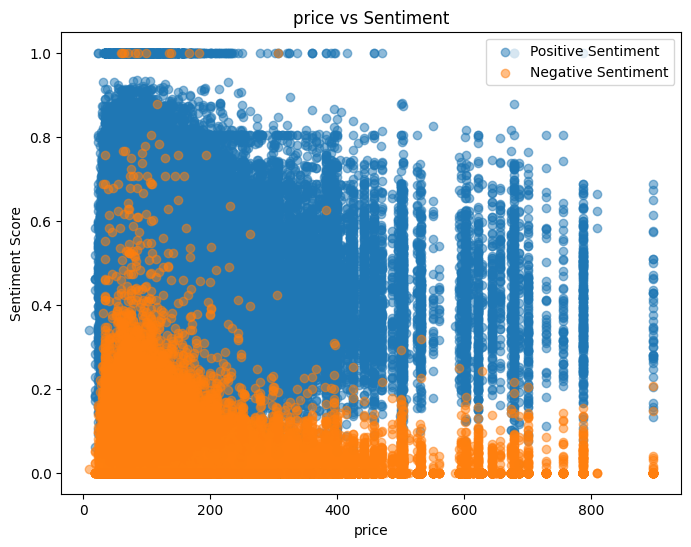

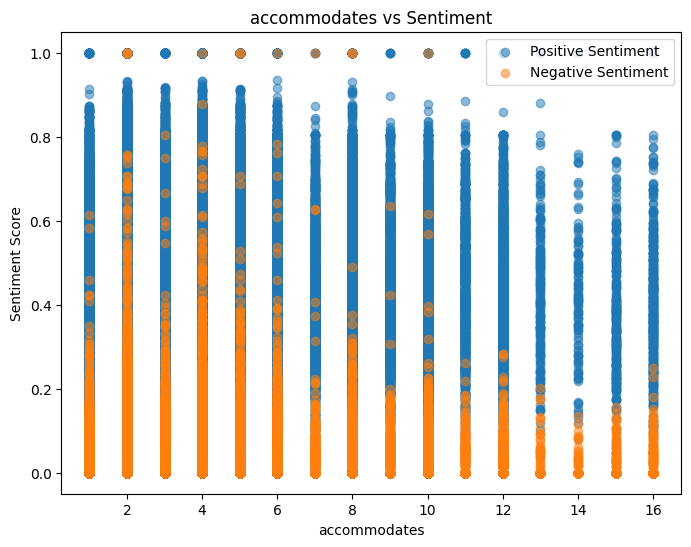

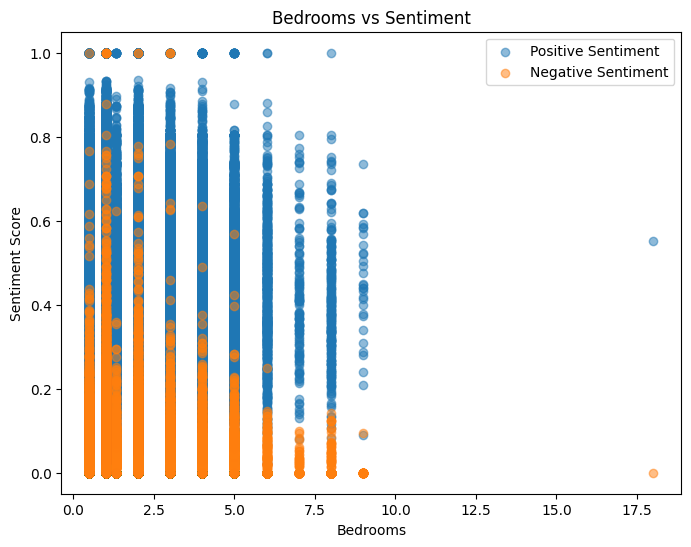

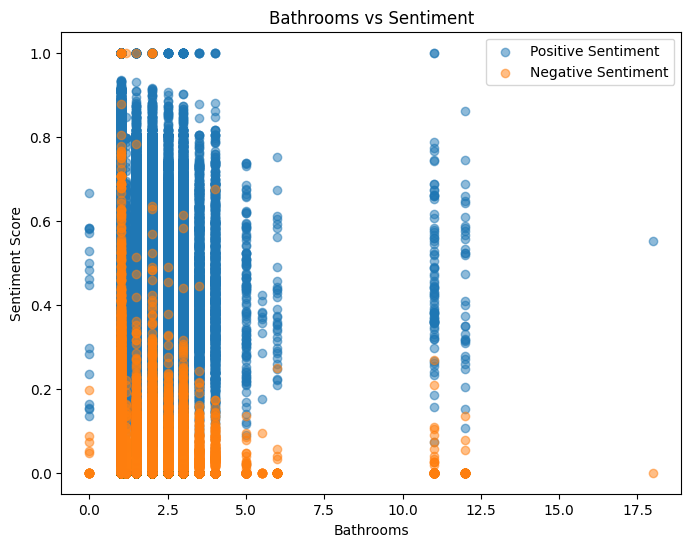

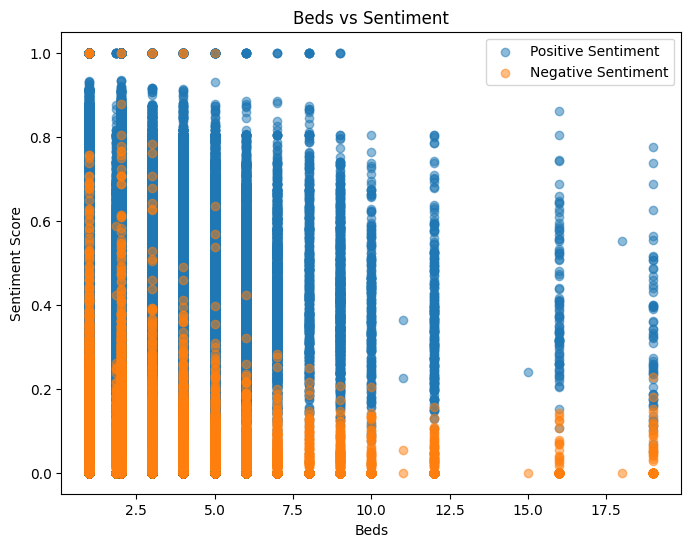

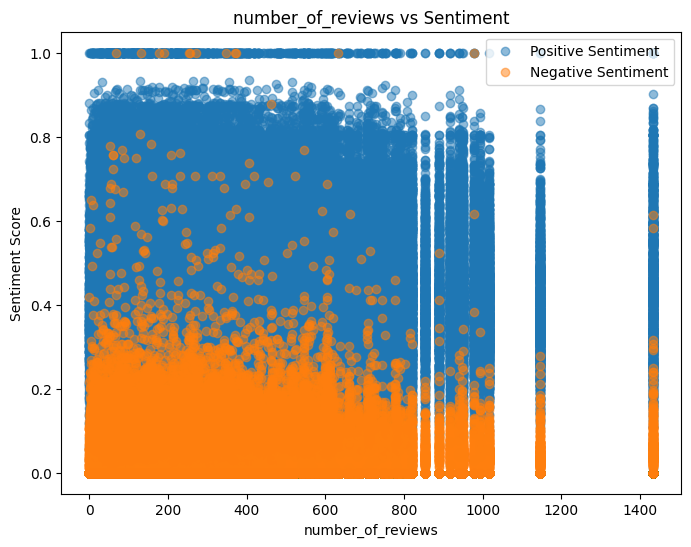

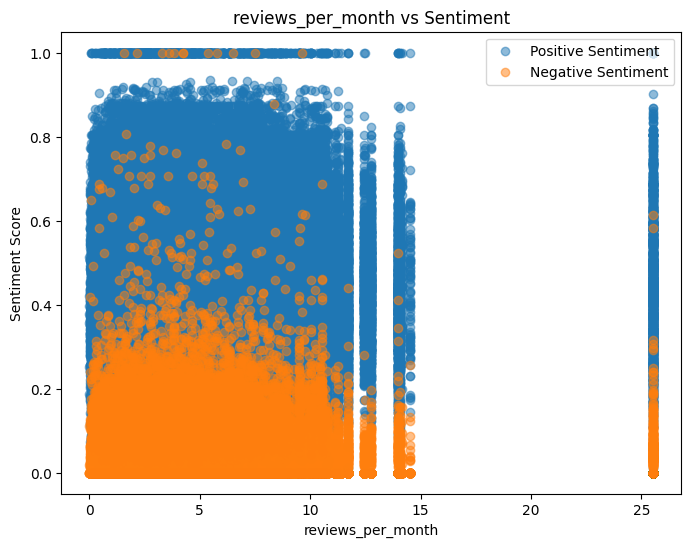

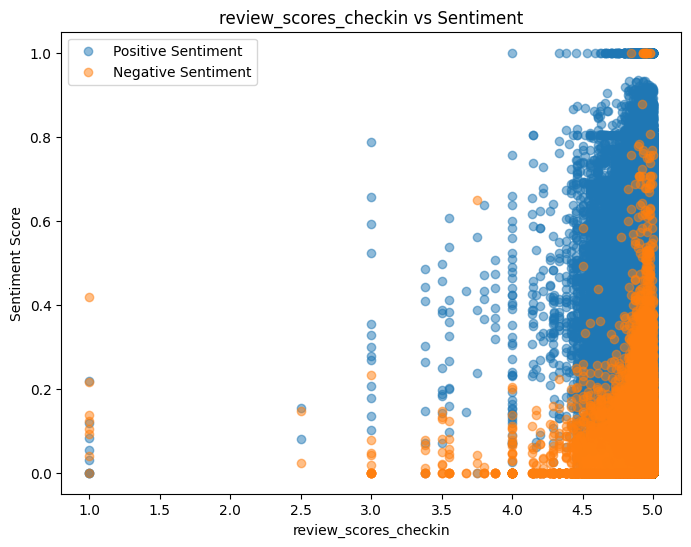

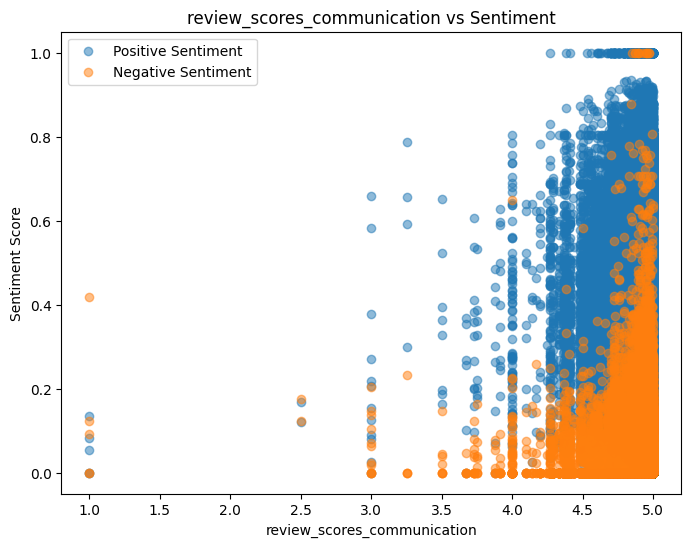

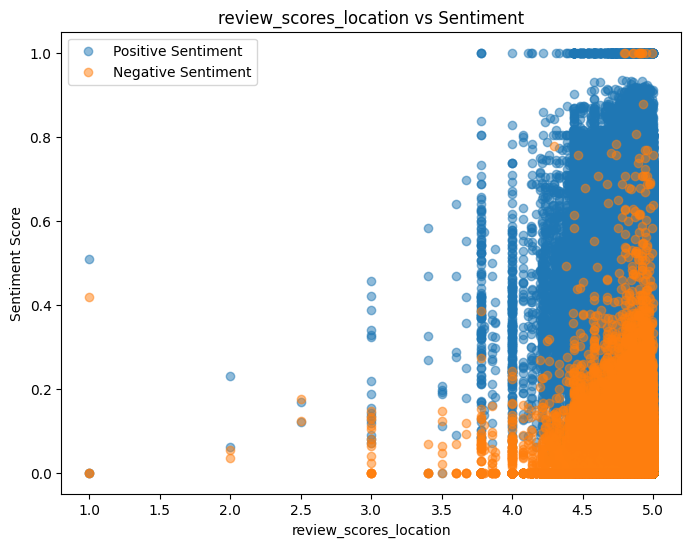

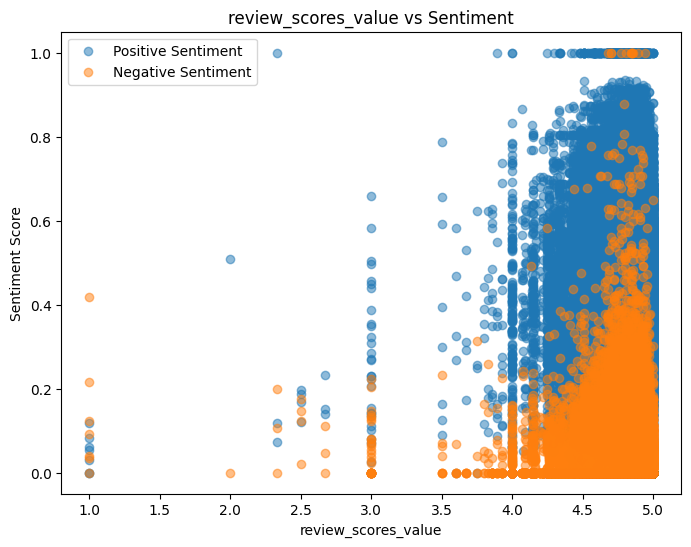

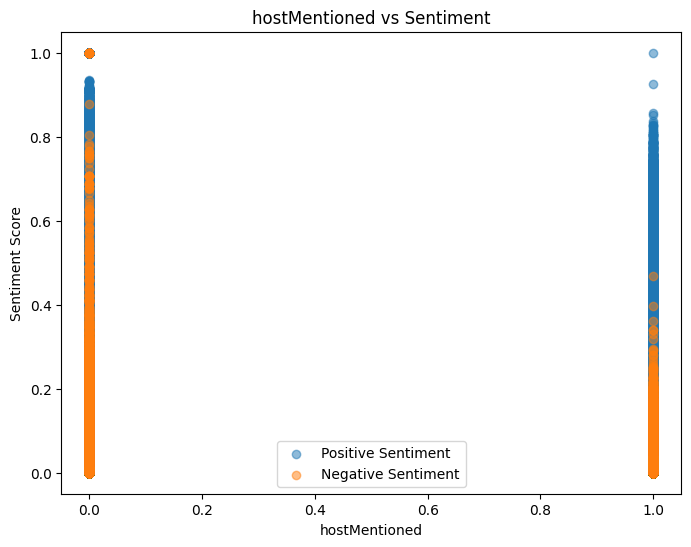

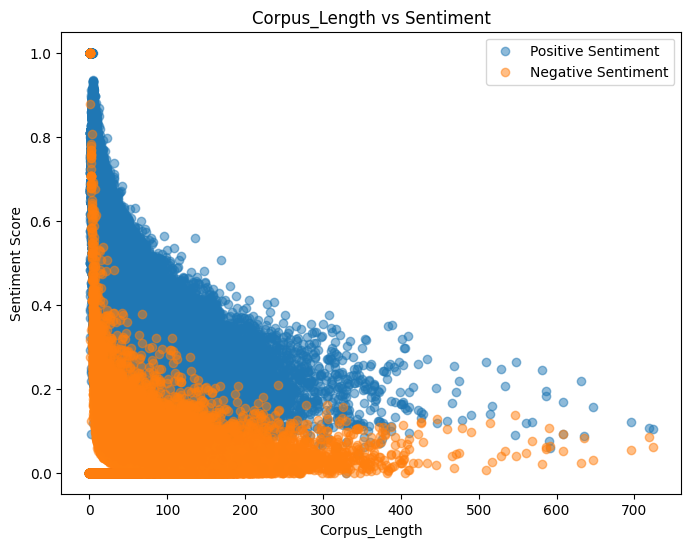

In [14]:
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['posVader'], label='Positive Sentiment', alpha=0.5)
    plt.scatter(df[feature], df['negVader'], label='Negative Sentiment', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.title(f'{feature} vs Sentiment')
    plt.show()

Accommodates vs Sentiment:
There is no clear linear relationship between the number of accommodates and sentiment scores (both positive and negative).
The sentiment scores are scattered across different values of accommodates, with no apparent trend.
The majority of the data points are clustered around lower values of accommodates (2 to 6), indicating that most listings have a smaller accommodation capacity.

Bathrooms vs Sentiment:
Similar to accommodates, there is no strong linear relationship between the number of bathrooms and sentiment scores.
The sentiment scores are scattered across different values of bathrooms, without a clear pattern.
Most of the data points are concentrated around lower values of bathrooms (0.0 to 2.5), suggesting that the majority of listings have fewer bathrooms.

Bedrooms vs Sentiment:
The scatter plot for bedrooms vs sentiment shows a similar pattern to the bathrooms vs sentiment plot.
There is no obvious linear relationship between the number of bedrooms and sentiment scores.
The sentiment scores are dispersed across different values of bedrooms, without a clear trend.
The data points are mostly clustered around lower values of bedrooms (0.0 to 2.5), indicating that most listings have fewer bedrooms.

Beds vs Sentiment:
The scatter plot for beds vs sentiment resembles the plots for accommodates, bathrooms, and bedrooms.
There is no strong linear relationship between the number of beds and sentiment scores.
The sentiment scores are scattered across different values of beds, without a distinct pattern.
The majority of the data points are concentrated around lower values of beds (2.5 to 5.0), suggesting that most listings have fewer beds.

Corpus Length vs Sentiment:
The scatter plot for corpus length vs sentiment shows a more interesting pattern compared to the previous features.
There appears to be a negative relationship between corpus length and positive sentiment scores. As the corpus length increases, the positive sentiment scores tend to decrease.
On the other hand, there seems to be a positive relationship between corpus length and negative sentiment scores. As the corpus length increases, the negative sentiment scores tend to increase slightly.

Host Mentioned vs Sentiment: There appears to be no clear relationship between whether the host is mentioned and the positive or negative sentiment scores. The sentiment scores are spread out similarly for both cases (host mentioned or not).

Number of Reviews vs Sentiment :
The plots show a very slight positive correlation between number of reviews and positive sentiment scores. As the number of reviews increases, there is a subtle upward trend in positive sentiment. However, the relationship is not strong. There is no discernible pattern between number of reviews and negative sentiment.

Price vs Sentiment: Again, there is no clear relationship between price and sentiment scores. Both positive and negative sentiment are spread out across the price range without any obvious trends.

Review Scores (Checkin) vs Sentiment :
There seems to be a very slight upward trend in positive sentiment as the review checkin score increases from 1 to 5. However, the relationship is quite weak. Negative sentiment shows no clear pattern.

Review Scores (Communication) vs Sentiment:
Similar to the checkin scores, there is a subtle positive correlation between communication scores and positive sentiment. As scores increase, positive sentiment very slightly trends upward on average. No relationship is seen with negative sentiment.

review_scores_location vs Sentiment:

There appears to be little correlation between a listing's review location score and the sentiment scores from the reviews.
Both positive and negative sentiment is seen across the full range of location scores.
The positive sentiment points are more concentrated in the upper right (high location score and high sentiment), while negative sentiment is more dispersed.

review_scores_value vs Sentiment:

Showing little clear relationship between a listing's value score and the review sentiments.
Positive sentiments cluster more in the upper right (high value scores) compared to negative.
Negative sentiment points are spread across all value score levels.

reviews_per_month vs Sentiment:

Positive sentiment dominates across all frequencies of reviews per month. There are far fewer negative sentiment points overall.
For both sentiments, the points are most concentrated at lower reviews per month (under 10).
Above 10-15 reviews per month, the sentiment points become much more sparse, especially for negative sentiment.



The Random Forest models identify Corpus_Length as the most important feature for both positive and negative sentiment prediction.
The physical characteristics of the listings (accommodates, Bedrooms, Bathrooms, Beds) have lower importance compared to the review-related features.

# Feature Engineering

In [19]:
df['bedrooms_to_accommodates_ratio'] = df['Bedrooms'] / df['accommodates']
print(df['bedrooms_to_accommodates_ratio'].head())

0    0.666667
1    0.666667
2    0.666667
3    0.666667
4    0.666667
Name: bedrooms_to_accommodates_ratio, dtype: float64


In [20]:
df['price_per_person'] = df['price'] / df['accommodates']
print(df['price_per_person'].head())

0    26.666667
1    26.666667
2    26.666667
3    26.666667
4    26.666667
Name: price_per_person, dtype: float64


Summary Statistics for bedrooms_to_accommodates_ratio:
count    470365.000000
mean          0.410054
std           0.164341
min           0.062500
25%           0.250000
50%           0.500000
75%           0.500000
max           5.000000
Name: bedrooms_to_accommodates_ratio, dtype: float64

Summary Statistics for price_per_person:
count    470365.000000
mean         34.332417
std          15.845339
min           2.500000
25%          23.500000
50%          32.000000
75%          41.250000
max         235.500000
Name: price_per_person, dtype: float64


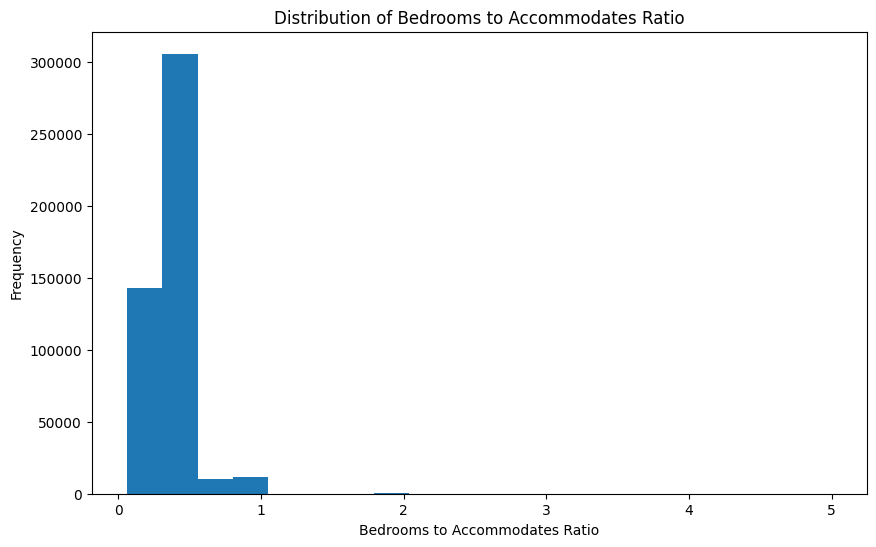

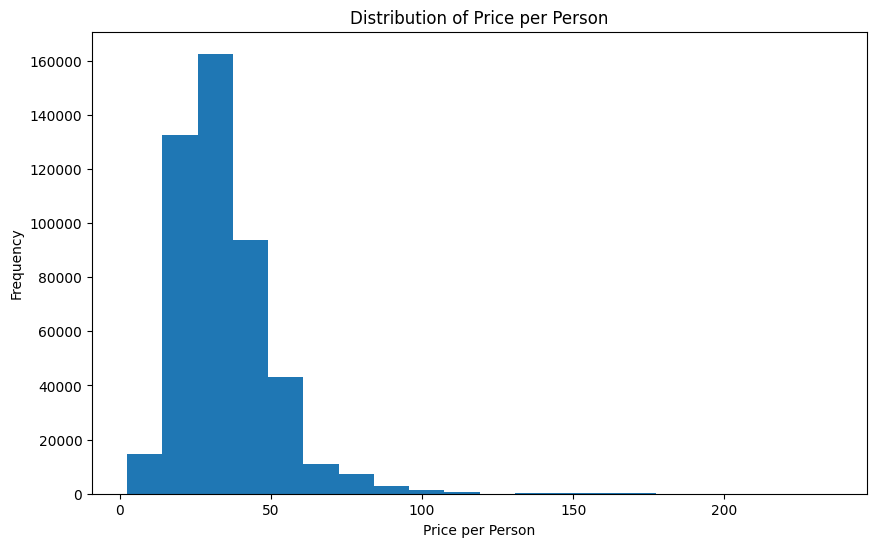

In [26]:
print("Summary Statistics for bedrooms_to_accommodates_ratio:")
print(df['bedrooms_to_accommodates_ratio'].describe())

print("\nSummary Statistics for price_per_person:")
print(df['price_per_person'].describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['bedrooms_to_accommodates_ratio'], bins=20)
plt.xlabel('Bedrooms to Accommodates Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms to Accommodates Ratio')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['price_per_person'], bins=20)
plt.xlabel('Price per Person')
plt.ylabel('Frequency')
plt.title('Distribution of Price per Person')
plt.show()

The mean bedrooms_to_accommodates_ratio is 0.410054, indicating that on average, there are approximately 0.41 bedrooms per accommodated person. The median ratio is 0.500000, suggesting that half of the listings have a ratio of 0.5 or higher.
The mean price_per_person is 34.332417, indicating that on average, the price per person is around 34 Dollars. The median price per person is 32.000000 Dollars, suggesting that half of the listings have a price per person of 32 dollars or lower.


# Text Analysis

In [24]:
df['comment_sentiment'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [29]:
# Latent Dirichlet Allocation (LDA)to identify common topics in the review comments
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['comments'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

topic_keywords = []
for topic in lda.components_:
    keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]
    topic_keywords.append(keywords)

In [32]:
#topics and their top keywords
for index, keywords in enumerate(topic_keywords):
    print(f"Topic {index + 1}: {', '.join(keywords)}")


Topic 1: place, parking, house, stay, night
Topic 2: kitchen, bed, space, nice, bathroom
Topic 3: great, location, place, stay, clean
Topic 4: portland, house, home, stay, coffee
Topic 5: stay, place, portland, great, clean


The output shows the top keywords for each topic, providing insights into the main themes discussed in the reviews.

# Segmentation Analysis

Segment the data based on property_type, room_type, or neighborhood and analyze the sentiment scores within each segment.

In [30]:
segments = ['property_type', 'room_type', 'neighborhood']

for segment in segments:
    print(f"Sentiment Scores by {segment}:")
    print(df.groupby(segment)[['posVader', 'negVader']].mean())
    print()

Sentiment Scores by property_type:
                                   posVader  negVader
property_type                                        
Boat                               0.372142  0.018317
Camper/RV                          0.404013  0.007577
Casa particular                    0.427000  0.000000
Dome                               0.411163  0.007349
Entire bungalow                    0.416560  0.008785
Entire cabin                       0.416649  0.009731
Entire condo                       0.399633  0.012982
Entire cottage                     0.411256  0.009847
Entire guest suite                 0.416774  0.009947
Entire guesthouse                  0.415697  0.009138
Entire home                        0.416486  0.010444
Entire loft                        0.410400  0.011654
Entire place                       0.422946  0.010032
Entire rental unit                 0.415125  0.011193
Entire serviced apartment          0.422677  0.009898
Entire townhouse                   0.415791  0.

In the property type segmentation, "Private room in bed and breakfast" has a relatively high positive sentiment score compared to other property types.

# Statistical Tests

In [28]:
room_types = df['room_type'].unique()

for room_type in room_types:
    pos_scores = df[df['room_type'] == room_type]['posVader']
    neg_scores = df[df['room_type'] == room_type]['negVader']
    
    t_stat, p_value = stats.ttest_ind(pos_scores, neg_scores)
    print(f"Room Type: {room_type}")
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
    print()

Room Type: Entire home/apt
t-statistic: 1703.0977, p-value: 0.0000

Room Type: Private room
t-statistic: 605.2881, p-value: 0.0000

Room Type: Shared room
t-statistic: 56.2871, p-value: 0.0000

Room Type: Hotel room
t-statistic: 112.1090, p-value: 0.0000



The output shows the results of independent t-tests comparing the positive and negative sentiment scores for each room type.
For all room types, the t-statistic is large and the p-value is close to 0, indicating a significant difference between the positive and negative sentiment scores.
This suggests that there is a statistically significant difference in sentiment between positive and negative reviews for each room type.

# Qualitative Analysis

In [39]:
high_threshold = 0.8
low_threshold = 0.2

high_sentiment_reviews = df[df['sentimentVader'] >= high_threshold]['comments']
low_sentiment_reviews = df[df['sentimentVader'] <= low_threshold]['comments']

print("High Sentiment Reviews:")
print(high_sentiment_reviews.head())

print("Low Sentiment Reviews:")
print(low_sentiment_reviews.head())

High Sentiment Reviews:
0    Recommended! Very good value for a spacious, a...
1    Our ten days visiting in Portland were enormou...
2    We had a wonderful time staying in the area of...
4    Clean, comfortable, quiet rooms; easygoing gen...
5    Beautiful neighborhood, convenient to the airp...
Name: comments, dtype: object
Low Sentiment Reviews:
99     A casa é legal. Há aquecedores na sala, banhei...
235                                           Must stay!
288                                100% customer service
334    The location, common areas, space, and the roo...
495                       I don't want to leave a review
Name: comments, dtype: object


The analysis reveals that the length of the review text (Corpus_Length) has the strongest relationship with sentiment scores, while other features such as review-related attributes and physical characteristics of the listings have weaker associations.

Overall, this analysis provides valuable insights into guest sentiment and preferences in Airbnb listings. The findings can be used by hosts to improve their listings, by focusing on the aspects that matter most to guests and addressing any areas of concern. The sentiment analysis can also be leveraged by Airbnb to enhance their platform, provide personalized recommendations, and improve the overall user experience. Further analysis could explore additional features.